In [203]:
import pandas as pd;
import numpy as np;
import matplotlib.pyplot as plt;
import seaborn as sns;

In [204]:
df = pd.read_csv('placement.csv');    
df.shape
df.head()

,cgpa,placement_exam_marks,placed
0,7.19,26.0,1
1,7.46,38.0,1
2,7.54,40.0,1
3,6.42,8.0,1
4,7.23,17.0,0


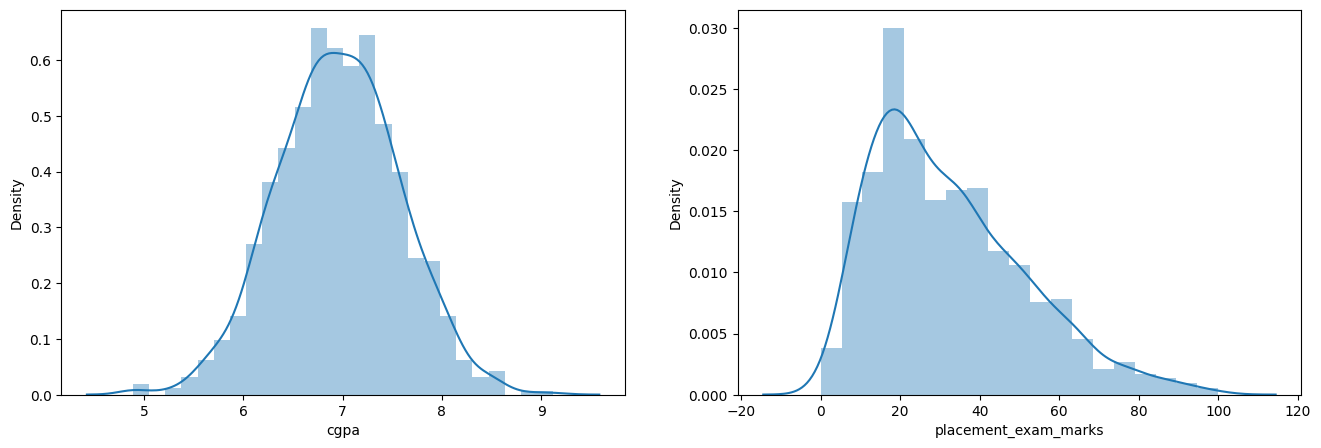

In [205]:
plt.figure(figsize=(16,5))
plt.subplot(1,2,1)
sns.distplot(df['cgpa'])

plt.subplot(1,2,2)
sns.distplot(df['placement_exam_marks'])

plt.show()

In [206]:
df['placement_exam_marks'].describe()

count    1000.000000
mean       32.225000
std        19.130822
min         0.000000
25%        17.000000
50%        28.000000
75%        44.000000
max       100.000000
Name: placement_exam_marks, dtype: float64

<Axes: ylabel='placement_exam_marks'>

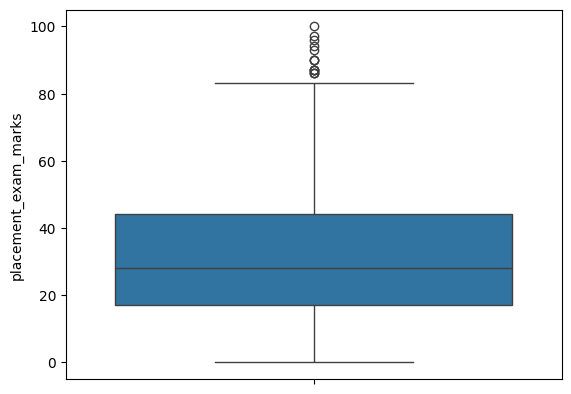

In [207]:
sns.boxplot(df['placement_exam_marks'])

In [208]:
#finding the IQR
percentile25 =df['placement_exam_marks'].quantile(0.25)
percentile75 = df['placement_exam_marks'].quantile(.75)

percentile75

44.0

In [209]:
iqr = percentile75 - percentile25
iqr

27.0

In [210]:
upperlimit = percentile75 + 1.5*iqr
lowerlimit = percentile25 - 1.5*iqr

print("UpperLimit",upperlimit)
print("LowerLimit",lowerlimit)

UpperLimit 84.5
LowerLimit -23.5


In [211]:
#finding outliers
df[df['placement_exam_marks']>upperlimit]

,cgpa,placement_exam_marks,placed
9,7.75,94.0,1
40,6.60,86.0,1
61,7.51,86.0,0
134,6.33,93.0,0
162,7.80,90.0,0
283,7.09,87.0,0
290,8.38,87.0,0
311,6.97,87.0,1
324,6.64,90.0,0
630,6.56,96.0,1


In [212]:
df[df['placement_exam_marks']<lowerlimit]

,cgpa,placement_exam_marks,placed


<h1>Trimming</h1>


In [213]:
new_df = df[(df['placement_exam_marks']>lowerlimit) & (df['placement_exam_marks']<upperlimit)]
new_df.shape

(985, 3)

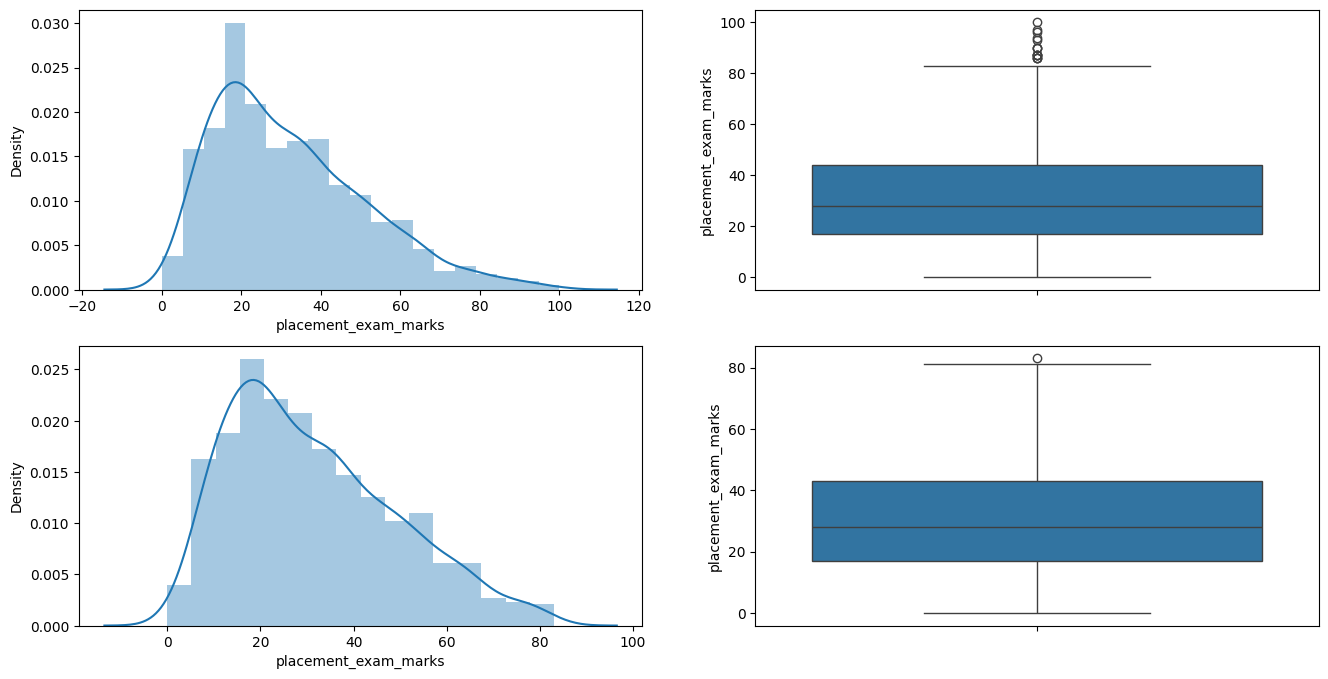

In [214]:
#comparing

plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df['placement_exam_marks'])

plt.show()


<h1>Capping</h1>

In [215]:
new_df_cap = df.copy()

new_df_cap['placement_exam_marks'] = np.where(
    new_df_cap['placement_exam_marks']>upperlimit,
    upperlimit,
    np.where(
        new_df_cap['placement_exam_marks']<lowerlimit,
        lowerlimit,
        new_df_cap['placement_exam_marks']
    )
)

In [216]:
new_df_cap.shape

(1000, 3)

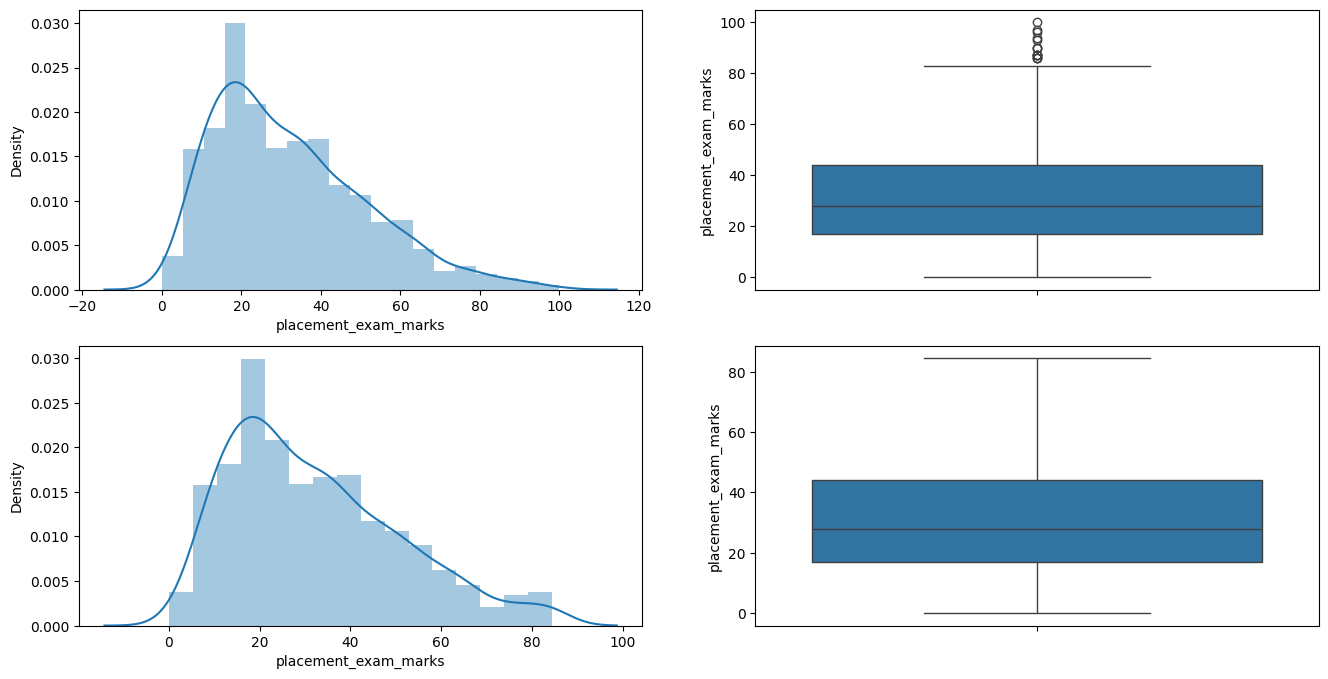

In [217]:
plt.figure(figsize=(16,8))
plt.subplot(2,2,1)
sns.distplot(df['placement_exam_marks'])

plt.subplot(2,2,2)
sns.boxplot(df['placement_exam_marks'])

plt.subplot(2,2,3)
sns.distplot(new_df_cap['placement_exam_marks'])

plt.subplot(2,2,4)
sns.boxplot(new_df_cap['placement_exam_marks'])

plt.show()